# Intermediate Macroeconomics - A Dynamic Macro model

In this assignment, we consider the AD-AS model as we discussed in chapter 7 of the book.

We first import some libraries.

In [1]:
import numpy as np
from scipy import optimize,arange
from scipy.optimize import fsolve
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

# The model

In the third week of the course, we discussed the AD-AS model that can be used to analyze the effects of (policy) shocks. We saw it's important to make a distinction between a fixed exchange rate regime and a flexible exchange rate regime. For tractibility reasons, we normally assumed perfect international capital mobility, as measured by the parameter 'kappa'. In this assignment, we can easily relax this assumption. Furthermore, we can include adaptive price expectations. We assume exchange rates are flexible



** Exercise 1**

Let's specify some parameters, exogenous variables and equations. Use the information of the model provided in the Word file. You can choose as starting value of the expected price level $P^e$ = 5 and assume perfect international capital mobility, indicated by setting $\kappa$ = 1000000. Call this "kappa_high" and call the value of M "M_old".

By using the fsolve command, you can let Pyhton calculate the equilibrium values of Y, i, P and E. These variables are part of the vector q. In the command return(...), you can plug in the four equilibrium conditions (e.g. one of them is the equation for equilibrium in the money market): think about IS, LM, FE and AD=AS. To do that correclt, formulate an equation like x=y as x-y, the program will read this as x-y=0).

In [2]:
# Model parameters (initial values)
c = 0.75 # marginal propensity to consume
b = 0.1 # sensitivity of investments for interest rate
kappa_high = 1000000


# Exogenous (parts of) variables (initial values)
C0 = 15 # autonomous consumption
I0 = 20 # autonomous investment
G = 25
T = 25
iw = 5
Yw = 100
Pw = 1
Ylr = 220
Pe = 5
M_old = 100



# Equilibrium equations

def equations(q):
    Y = q[0]  # real GDP
    i = q[1]  # interest rate
    E = q[2]  # nominal exchange rate
    P = q[3]  # general price level
    Y, i, E, P = q

    C = C0 + c*(Y-T)   # consumption function
    I = I0 - b*i
    R = (E*Pw)/P
    EX = 0.1*Yw + 10*R
    IM = 0.1*(Y-T)-10*R
    CA = EX-IM
    CP = kappa_high*(i-iw)
    L = 0.5*Y - 2*i
    
    return (CA+CP,(M_old/P)-L,P-Pe-(0.1*(Y-Ylr)),Y-C-I-G-EX+IM)

q = fsolve(equations, (100,1,1,1))
equations(q)

print(q)


[182.32123815   4.99999517   0.65070931   1.23212381]


** Exercise 2**

In the previous exercise you calculated the equilibrium for one point in time. If you did correctly, you found a price level ($P$) that is not equal to the expected price level ($P^e$). So if we assume adaptive expectations, the economy will adjust over time.
- Transform the model into a dynamic model with adaptive price expectations (so $P^e = P_{t-1}$). You can still use the initial level of $P^e$ = 5 as the starting level.
- Make use of a loop command to calculate the development of Y, i, P and E over 5 periods (it needs to solve for the equilibrium at every time as you did above).
- Plot this in a graph for each variable $Y$, $i$, $E$ and $P$ separately (with time on the x-axis and e.g. Y on the y-axis)
- Explain the development of each variable over time.

Tip: make use of the "list" and "append" command when you create a vector for the variable $Y$, $P$ etc.


In [3]:
#VECTORS
Y=[]
Y_0=182.32123815
Y.append(Y_0)
i=[]
i_0=4.99999517
i.append(i_0)
E=[]
E_0=0.65070931
E.append(E_0)
P=[]
P_0=1.23212381
P.append(P_0)


In [4]:
for t in range(1,5):
    Pe=P[t-1]
    q = fsolve(equations, (100,1,1,1))
    Y.append(q[0])
    i.append(q[1])
    E.append(q[2])
    P.append(q[3])
    print(q)


[217.79046976   4.9999863    1.16166653   1.01117079]
[219.89361154   4.99998578   1.18626872   1.00053194]
[219.99493119   4.99998575   1.18744098   1.00002506]
[219.99975862   4.99998575   1.1874968    1.00000092]


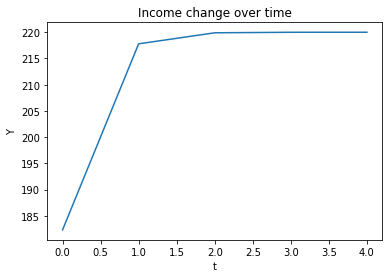

In [5]:
range_t=arange(0,5,1)
plt.plot(range_t,Y)
plt.xlabel("t")
plt.ylabel("Y")
plt.title("Income change over time")

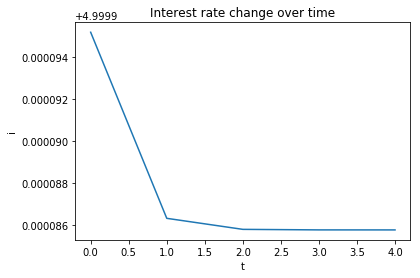

In [6]:
plt.plot(range_t,i)
plt.xlabel("t")
plt.ylabel("i")
plt.title("Interest rate change over time")

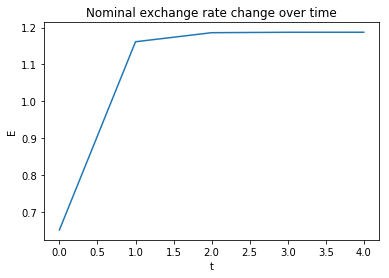

In [7]:
plt.plot(range_t,E)
plt.xlabel("t")
plt.ylabel("E")
plt.title("Nominal exchange rate change over time")

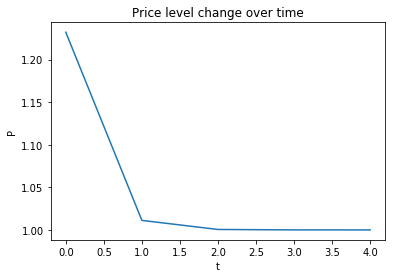

In [8]:
plt.plot(range_t,P)
plt.xlabel("t")
plt.ylabel("P")
plt.title("Price level change over time")

** Exercise 3**

Suppose now the economy starts in its long-run equilibrium. The starting value fo $P^e$ should then be equal to 1.
- Analyse the dynamic effects of monetary expansion: M is increased to 120 (call this "M_new"). Plot in separate figures what happens to $Y$, $i$, $P$ and $E$ over 5 periods.
- Explain your findings. Do you observe exchange rate overshooting?

In [9]:
Pe=1
q = fsolve(equations, (100,1,1,1))
print(q)

[219.99999729   4.99998575   1.18749956   0.99999973]


In [10]:
Y=[]
Y_0=219.99999729
Y.append(Y_0)
i=[]
i_0=4.99998575
i.append(i_0)
E=[]
E_0=1.18749956
E.append(E_0)
P=[]
P_0=0.99999973
P.append(P_0)
print

<function print>

In [11]:
M_new=120

for t in range(1,5):
    Pe=P[t-1]
    M_old=M_new
    q = fsolve(equations, (100,1,1,1))
    Y.append(q[0])
    i.append(q[1])
    E.append(q[2])
    P.append(q[3])
    print(q)
    


[221.88785203   4.99998528   1.45093009   1.18878493]
[220.10587077   4.99998572   1.42644155   1.19937201]
[220.0059899    4.99998575   1.42505599   1.199971  ]
[220.00033906   4.99998575   1.42497756   1.20000491]


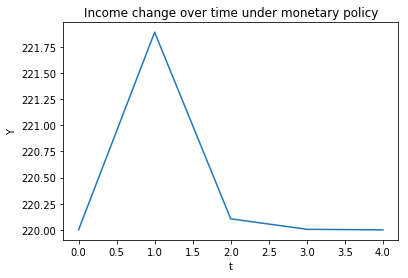

In [12]:
plt.plot(range_t,Y)
plt.xlabel("t")
plt.ylabel("Y")
plt.title("Income change over time under monetary policy")

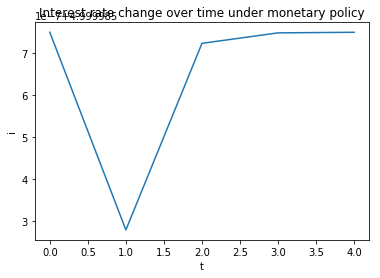

In [13]:
plt.plot(range_t,i)
plt.xlabel("t")
plt.ylabel("i")
plt.title("Interest rate change over time under monetary policy")

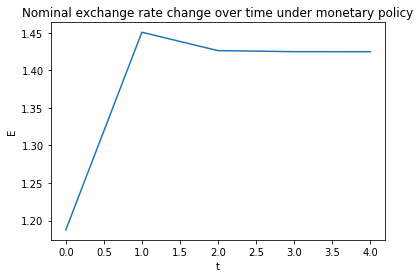

In [14]:
plt.plot(range_t,E)
plt.xlabel("t")
plt.ylabel("E")
plt.title("Nominal exchange rate change over time under monetary policy")

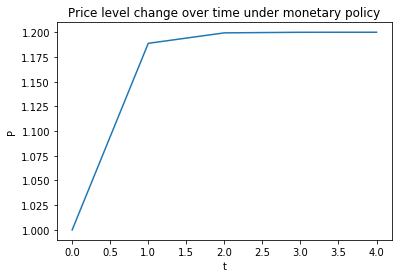

In [15]:
plt.plot(range_t,P)
plt.xlabel("t")
plt.ylabel("P")
plt.title("Price level change over time under monetary policy")

We can observe from the results that monetary policy has an effect on income in the first periods, because of the pressure generated on the interest rate (capital outflows under perfect capital mobility), followed by the depreciation of the currency. But because of the adaptive expectations over the price, the income returns to its initial state. On the other hand the price level and the nominal exchange rate overshoot and converged at a higher value.

** Exercise 4**

Do the same as under exercise 3, but now show in each graph the effects of this monetary expansion on $Y$, $i$, $P$ and $E$ in case of (1) perfect capital mobility (as before) and (2) imperfect capital mobility by taking $\kappa$ = 5.



In [16]:
Pe=1
kappa_low = 5 
kappa_high=kappa_low
q = fsolve(equations, (100,1,1,1))
print(q)

[221.28291753   2.14299424   1.34906012   1.12829175]


In [17]:
Y2=[]
Y2_0=221.28291753
Y2.append(Y2_0)
i2=[]
i2_0=2.14299424
i2.append(i_0)
E2=[]
E2_0=1.34906012
E2.append(E_0)
P2=[]
P2_0=1.12829175
P2.append(P2_0)
print(Y2)

[221.28291753]


In [18]:
for t in range(1,5):
    Pe=P[t-1]
    M_old=M_new
    q = fsolve(equations, (100,1,1,1))
    Y2.append(q[0])
    i2.append(q[1])
    E2.append(q[2])
    P2.append(q[3])
    print(q)
print(Y2)
print(i2)
    

[221.28292007   2.14299411   1.34906015   1.12829174]
[219.50876212   2.22996264   1.32776581   1.13966114]
[219.40933107   2.23483671   1.32655968   1.14030512]
[219.40370572   2.23511246   1.3264914    1.14034157]
[221.28291753, 221.2829200678702, 219.50876211540984, 219.40933106963078, 219.40370571649464]
[4.99998575, 2.1429941143200866, 2.2299626414014773, 2.2348367122730015, 2.2351124648777114]


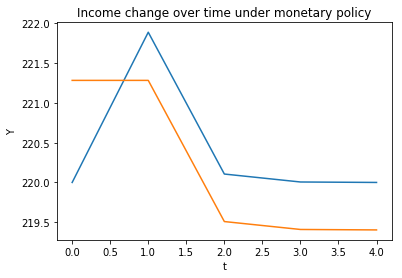

In [19]:
plt.plot(range_t,Y,label='perf.cap mobility')
plt.plot(range_t,Y2,label='no perf.cap mobility')
plt.xlabel("t")
plt.ylabel("Y")
plt.title("Income change over time under monetary policy")

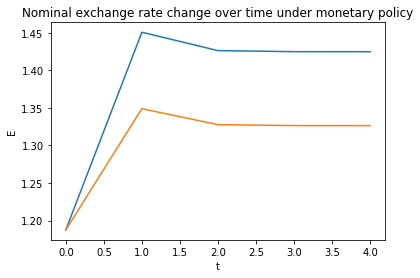

In [20]:
plt.plot(range_t,E)
plt.plot(range_t,E2)
plt.xlabel("t")
plt.ylabel("E")
plt.title("Nominal exchange rate change over time under monetary policy")

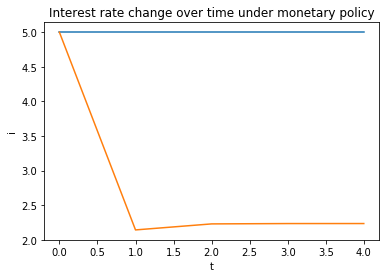

In [21]:
plt.plot(range_t,i)
plt.plot(range_t,i2)
plt.xlabel("t")
plt.ylabel("i")
plt.title("Interest rate change over time under monetary policy")

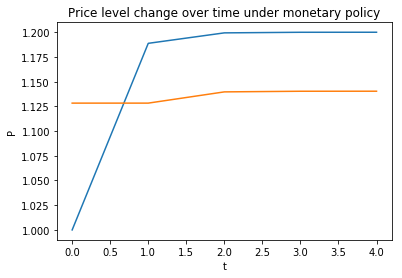

In [22]:
plt.plot(range_t,P)
plt.plot(range_t,P2)
plt.xlabel("t")
plt.ylabel("P")
plt.title("Price level change over time under monetary policy")

The results show that under imperfect capital mobility, the interest rate did not converged again to the world interest rate, this led to a lower depreciation and in the end, the monetary policy was not as effective as in the full capital mobility escenario. 